<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision
Convolutional Neural Networks

Computer Vision Library:
* `torchvision`- base domain library for PyTorch computer vision
* `torchvision.datasets`- get datasets and data loading functions for computer vision
* `torchvision.models`- get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset`- Base Dataset class.
* `torch.utils.data.DataLoader`- Create apython iterable over a dataset.  


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

## Getting a dataset 

In [2]:
#Setup traning data
train_data= datasets.FashionMNIST(
    root=  "data",
    train= True,
    download =True,
    transform =torchvision.transforms.ToTensor(),
    target_transform= None,
)

#Setup testing data
test_data= datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True, 
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
print(f"Image Shape : [Color_channels, height, Width] :{image.shape}")
print(f"Image Label: {label}")

Image Shape : [Color_channels, height, Width] :torch.Size([1, 28, 28])
Image Label: 9


(-0.5, 27.5, 27.5, -0.5)

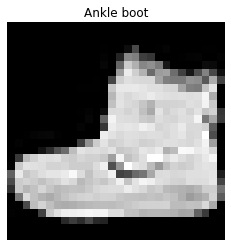

In [8]:
image, label= train_data[0]
image.shape
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

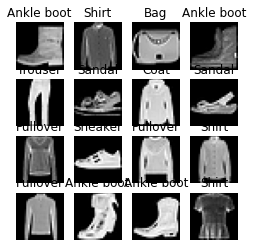

In [9]:
torch.manual_seed(42)
fig= plt.figure(figsize=(4,4))

rows=cols=4

for i in range(1, rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
 
  image, label= train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [10]:
from torchvision.datasets.folder import DatasetFolder
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader= DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)
test_dataloader= DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [11]:
train_features_batch, train_labesl_batch= next(iter(train_dataloader))

In [12]:
len(train_features_batch)

32

(-0.5, 27.5, 27.5, -0.5)

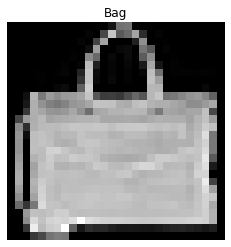

In [13]:
# torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
image, label= train_features_batch[random_idx], train_labesl_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Building Model

In [14]:
# Create a flatten layer
flatten_model= nn. Flatten()

x= train_features_batch[0]
# [Color Channels, Height , width]
print(x.shape)

# Perform forward propagation
output= flatten_model(x) 
# [Color Channels, Height*Width]
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


### Model V0

In [15]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )
  def forward(self, x):
    x=self.layer_stack(x)
    return(x)

In [16]:
torch.manual_seed(42)

model_0= FashionMNISTModelV0((28*28), 10, len(class_names))
model_0.cpu()

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [18]:
from helper_functions import accuracy_fn

In [19]:
loss_fn= torch.nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(model_0.parameters(), lr= 1e-3)

In [20]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

##Training Model

1. Loop through each epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**

In [21]:
# Import tqdm for the progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu= timer()

epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  #Training
  train_loss=0
  #Add a loop to loop through the training batches
  for batch, (image, label) in enumerate(train_dataloader):
    model_0.train()
    #Forward propagation
    y_pred=model_0(image)
    #Loss Function
    loss=loss_fn(y_pred, label)
    train_loss +=loss
    #Optimizer zero grad
    optimizer.zero_grad()
    #Loss backpropagation
    loss.backward()
    #optimizer step
    optimizer.step()
    # Printing What happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples")
  
  #Calculate the average train loss
  train_loss/=len(train_dataloader)

  #Testing
  test_loss, test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():
    for (test_image, test_label) in (test_dataloader):
      #forward Propagation
      test_pred = model_0(test_image)
      #Loss Function
      test_loss += loss_fn(test_pred, test_label)
      #Accuacy Function
      test_acc+= accuracy_fn(y_true=test_label,
                             y_pred=test_pred.argmax(dim=1) )
      
    #Calculate the average test loss / accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.62235 | Test loss: 0.51413, Test acc: 82.10%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46210 | Test loss: 0.47821, Test acc: 82.82%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.43799 | Test loss: 0.46594, Test acc: 83.52%

Train time on cpu: 24.442 seconds


##Testing Model

In [22]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Forward Propagation
      y_pred = model(X)
      # Loss/ Accuracy Function
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y ,y_pred.argmax(dim=1))
    
    # Calculate average loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}
       
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659401476383209,
 'model_acc': 83.51637380191693}

In [23]:
device ='cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

### Model V1

In [24]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layers(x)
    

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(28*28, 10, len(class_names)).to(device)
model_1 , next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layers): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ), device(type='cuda', index=0))

In [26]:
from helper_functions import accuracy_fn

In [27]:
loss_fn= torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model_1.parameters(), lr=1e-3)

## Functionizing Training and Testing Loop

* Training Loop Function : `train_step()`
* Testing Loop Function: `test_step()`
* Calculating Execution Time: `print_train_time`

In [28]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [29]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      #Put the data on the same device
      X, y= X.to(device), y.to(device)
      #Forward Propagation
      y_pred = model(X)
      # Loss/ Accuracy Function
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y ,y_pred.argmax(dim=1))
    
    # Calculate average loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device):
  
  train_loss, train_acc = 0, 0

  #Put Model into training mode
  model.train()

  for batch, (X, y) in enumerate(data_loader):

    #Put Data on target device
    X, y = X.to(device), y.to(device)

    #Forward propagation
    y_pred = model(X)

    #Loss Function (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #Accuaray Function (per batch)
    train_acc += accuracy_fn(y_true=y, 
                           y_pred=y_pred.argmax(dim=1))

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()
  
  #Calculate the average train loss and accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  #Print out the result of training loop
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}')


In [31]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc= 0, 0

  #Put the model on testing mode
  model.eval()

  with torch.inference_mode():
    for (test_X, test_y) in (data_loader):

      #Put the data on the same device:
      test_X, test_y = test_X.to(device), test_y.to(device)

      #forward Propagation
      test_pred = model(test_X)

      #Loss Function
      test_loss += loss_fn(test_pred, test_y)

      #Accuacy Function
      test_acc += accuracy_fn(y_true=test_y,
                             y_pred=test_pred.argmax(dim=1) )
      
    #Calculate the average test loss / accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    #Print out the result of testing loop
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

In [47]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device =device):
  pred_probs =[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare the sample (add batch dimension and pass to target device)
      sample= torch.unsqueeze(sample, dim=0).to(device)
      
      #Forward pass (model output raw logits)
      pred_logit= model(sample)

      #Get Prediction Probability (logit ->prediction probability)
      pred_prob= torch.softmax(pred_logit.squeeze(), dim=0)

      #Get preb_prob of gpu
      pred_probs.append(pred_prob.cpu())
  
  #Stack the pred_prob to turn list into a tensor
  return torch.stack(pred_probs)

## Training model

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  #Training Model
  train_step(model = model_1, 
             data_loader = train_dataloader, 
             loss_fn = loss_fn, 
             optimizer = optimizer, 
             accuracy_fn = accuracy_fn,
             device = device)
  #Testing Model
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                          end = train_time_end_on_gpu,
                                          device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09624 | Train acc: 63.13000
Test loss: 0.95434 | Test acc: 65.56510
Epoch: 1
-------
Train loss: 0.91125 | Train acc: 67.16000
Test loss: 0.92248 | Test acc: 66.24401
Epoch: 2
-------
Train loss: 0.88316 | Train acc: 67.78333
Test loss: 0.90342 | Test acc: 66.81310
Train time on cuda: 30.980 seconds


In [33]:
model_1_results= eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9034186601638794,
 'model_acc': 66.81309904153355}

In [34]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659401476383209,
 'model_acc': 83.51637380191693}

###Model V2

In [35]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    # Create First Convolutional Layer
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)

    )
    #Create Second Convolutional Layer
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding =1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    #Create First Classifier Layer
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7, output_shape)
    )
  
  def forward(self, x):
    x= self.conv_block1(x)
    # print(f"Output shape of conv_block1: {x.shape}")
    x= self.conv_block2(x)
    # print(f"Output shape of conv_block2: {x.shape}")
    x= self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2= FashionMNISTModelV2(input_shape=1, #Number of color channel
                             hidden_units=10,
                             output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model_2.parameters(), lr=1e-3)

In [38]:
from helper_functions import accuracy_fn

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(
      model = model_2,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )
  test_step(
      model = model_2,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn,
      device = device
  )
train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(
    start = train_time_start_model_2,
    end = train_time_end_model_2,
    device = device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.53795 | Train acc: 80.45833
Test loss: 0.40460 | Test acc: 85.45327
Epoch: 1
---------
Train loss: 0.36650 | Train acc: 86.76500
Test loss: 0.38828 | Test acc: 85.68291
Epoch: 2
---------
Train loss: 0.33142 | Train acc: 88.06500
Test loss: 0.34980 | Test acc: 87.21046
Train time on cuda: 42.904 seconds


In [40]:
model_2_results = eval_model(
    model= model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn, 
    accuracy_fn = accuracy_fn, 
    device = device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34979817271232605,
 'model_acc': 87.21046325878594}

## Comparing model result and training time

In [41]:
import pandas as pd

compare_results= pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

In [42]:
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.465940,83.516374
1,FashionMNISTModelV1,0.903419,66.813099
2,FashionMNISTModelV2,0.349798,87.210463


In [43]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.465940,83.516374,24.442032
1,FashionMNISTModelV1,0.903419,66.813099,30.980196
2,FashionMNISTModelV2,0.349798,87.210463,42.903875


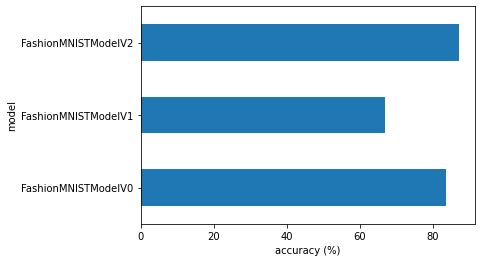

In [44]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [57]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (Pullover)


In [58]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]


tensor([[1.9559e-02, 1.2415e-03, 6.3098e-01, 1.2394e-02, 2.9092e-01, 1.0515e-05,
         2.6289e-02, 5.3878e-06, 1.8523e-02, 8.3523e-05],
        [1.1216e-04, 2.5035e-05, 2.5792e-02, 3.5367e-04, 9.7176e-01, 2.2913e-08,
         1.2780e-03, 7.9087e-07, 6.7872e-04, 1.6733e-06]])

In [59]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 4, 3, 2, 2, 0, 1, 1])

In [60]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([2, 4, 6, 3, 2, 2, 0, 1, 1], tensor([2, 4, 4, 3, 2, 2, 0, 1, 1]))

##Plot Prediction

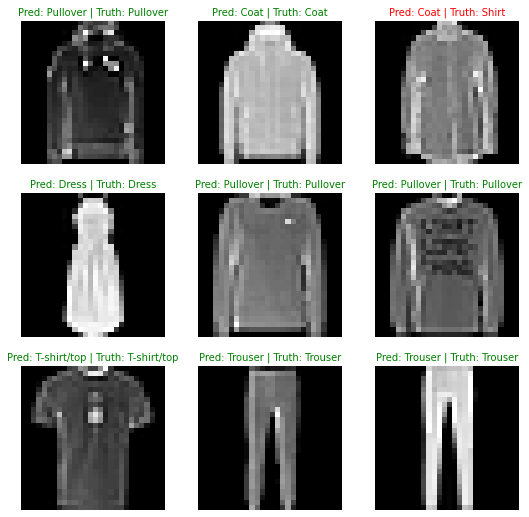

In [61]:
plt.figure(figsize=(9,9))
nrow, ncols=3,3
for i, sample in enumerate(test_samples):
  plt.subplot(nrow, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label=class_names[pred_classes[i]]
  truth_label= class_names[test_labels[i]]
  title_text= f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

##Confusion Metrix Evaluation models

In [63]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [64]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [65]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.21.0


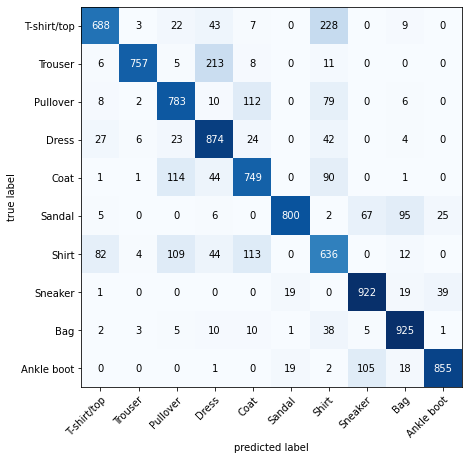

In [66]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [67]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [68]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [69]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34979817271232605,
 'model_acc': 87.21046325878594}

In [70]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)